## Imports

In [1]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.core.event import read_events
from obspy.clients.fdsn import Client

from earthquake import earthquake
import util
import pandas as pd

In [2]:
obspy.__version__

'1.2.2'

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
#root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

Open catalog of events

In [4]:
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader
from obspy.clients.fdsn import Client

client = Client("IRIS")
dates = ["2019-01-01", "2019-02-01", "2019-03-01", "2019-04-01", "2019-05-01", "2019-06-01", "2019-07-01", "2019-08-01", "2019-09-01", "2019-10-01", "2019-11-01", "2019-12-01"]
cat = client.get_events(starttime=UTCDateTime(dates[0]), endtime=UTCDateTime(dates[1]), includearrivals=True, minmagnitude=3)
print(len(cat))
for d in range(1, len(dates)-1):
    new_cat = client.get_events(starttime=UTCDateTime(dates[d]), endtime=UTCDateTime(dates[d+1]), includearrivals=True, minmagnitude=3)
    print(len(new_cat))
    for event in new_cat:
        cat.append(event)

1250
1140


IncompleteRead: IncompleteRead(144172 bytes read)

In [5]:
# client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/Users/rebecca/Documents/PhD/Research/Frequency/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [6]:
#len(cat_with_data)

In [7]:
#cat.plot()


In [8]:
#cat_with_data.plot()

In [9]:
%%script false --no-raise-error
cat[0].magnitudes[0].mag
mags = []
mags_d = []
for e in cat:
    mags.append(e.magnitudes[0].mag)
for e in cat_with_data:
    mags_d.append(e.magnitudes[0].mag)    
plt.hist(mags, np.arange(3, 8, 0.1))
plt.hist(mags_d, np.arange(3, 8, 0.1))
plt.yscale('log')

## the action!!
For all events with data, load the data and then create an earthquake object. work out tp_max and tc, and add to lists (for plotting)

In [10]:
df =  pd.read_pickle('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/dataframe_highpass_0_075Hz.pkl')

In [11]:
df

,magnitude,tpmax,tc
20190131_194949.a,4.20,"[0.16607816381, 0.108053433963, 0.150722188794]","[0.2682018971852354, 0.1908354211956681, 0.319..."
20190131_130953.a,4.90,[0.535748206024],[0.6393567378319965]
20190131_130350.a,4.10,[0.300150341878],[0.4349646099634537]
20190131_101656.a,3.09,[0.799385610062],[1.5794069483310673]
20190131_085520.a,3.00,"[0.192972954238, 0.260194743198, 0.16074816167...","[0.4321685995395488, 0.6982539328416297, 1.188..."
...,...,...,...
20190710_201915.a,4.50,[],[]
20190710_194859.a,3.00,[0.15327167403],[1.2272353069196682]
20190710_194552.a,4.60,[],[]
20190710_145814.a,4.40,[],[]


In [12]:
list_mags = df['magnitude']
list_tpmax = df['tpmax']
list_tc = df['tc']

In [13]:
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv_gr.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen_gr = []
tp_olsen_gr = []
for j in c:
    if float(j[3]):
        m_olsen_gr.append(float(j[3]))
        tp_olsen_gr.append(math.log(float(j[6]), 10))
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen = []
tp_olsen = []
for j in c:
    if float(j[3]):
        m_olsen.append(float(j[3]))
        tp_olsen.append(math.log(float(j[6]), 10))

## plotting
### tp and tc subplots
exclude points more than 2 std from the mean at each station. plot individual stations and the median of each station. 

make plot log-log

set up function for scipy line fitting

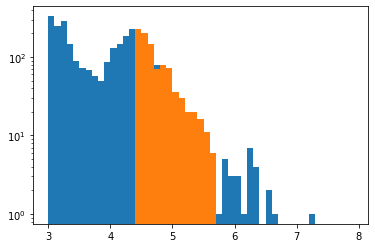

In [14]:
n, bins, patches = plt.hist(list_mags, np.arange(3, 8, 0.1))#np.arange(4.4, 5.8, 0.1))
n, bins, patches = plt.hist(list_mags, np.arange(4.4, 5.8, 0.1))
plt.yscale('log')

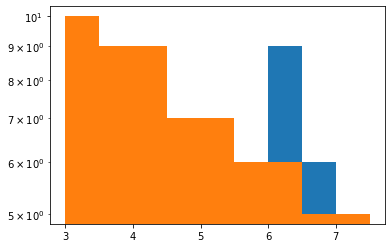

In [15]:
n, bins, patches = plt.hist(m_olsen, np.arange(3, 8, 0.5))
n, bins, patches = plt.hist(m_olsen_gr, np.arange(3, 8, 0.5))
plt.yscale('log')

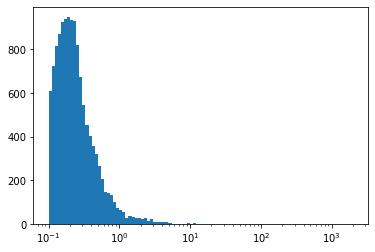

In [16]:
tp_use = []
for i in list_tpmax:
    if i != []:
        for j in i:
            tp_use.append(j)
n, bins, patches = plt.hist(tp_use, np.logspace(-1, 3.3, num=100))
min(tp_use)
max(tp_use)
plt.xscale('log')

In [17]:
max(n)

948.0

In [18]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [19]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [20]:
'''eq_name = '20190131_130350.a'
data = obspy.read(root+eq_name+'/data/*/*')
data.plot()
inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
data.remove_response(inv)
data.plot()'''

"eq_name = '20190131_130350.a'\ndata = obspy.read(root+eq_name+'/data/*/*')\ndata.plot()\ninv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')\ndata.remove_response(inv)\ndata.plot()"

plot directly in log space

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.0 [ 0.05035768 -0.78935333]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.1 [ 0.07066819 -0.87733392]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.2 [ 0.07344399 -0.88944718]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.3 [ 0.08894772 -0.95839556]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.4 [ 0.12142216 -1.10391708]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.5 [ 0.13823182 -1.17990812]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.6 [ 0.14537368 -1.2124622 ]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.7 [ 0.16208177 -1.28895478]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.8 [ 0.16999349 -1.3254641 ]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.9 [ 0.19359513 -1.43513974]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.0 [ 0.19718114 -1.45202098]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.1 [ 0.22471888 -1.58252898]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.2 [ 0.23395356 -1.62685831]
4.3 [ 0.23782464 -1.64575678]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.4 [ 0.27922207 -1.8506166 ]
230 230
[ 0.27922207 -1.8506166 ] [ 0.2334085   1.10971745]
4.5 [ 0.26138424 -1.76053203]
4.6 [ 0.29377621 -1.9272442 ]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.7 [ 0.38201005 -2.38747097]
4.8 [ 0.36197358 -2.28122759]
4.9 [ 0.43462341 -2.67003698]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

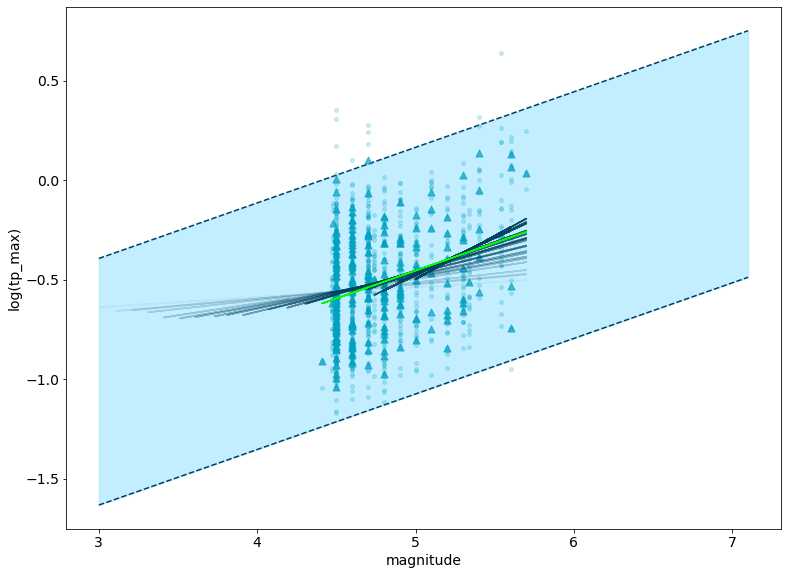

In [39]:

import matplotlib.pyplot as plt
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
y_aves_tc = []
x_aves_tp = []
x_aves_tc = []
count = 1
eq_count = 0
for mag_lim in np.arange(3, 5, 0.1):
    #print(mag_lim)
    y_aves_tp = []
    y_aves_tc = []
    x_aves_tp = []
    x_aves_tc = []
    for i  in range(0, len(list_mags)):
        if list_mags[i] > mag_lim and list_mags[i]<5.8:
            mean_tp = np.mean(list_tpmax[i]) 
            std_tp = np.std(list_tpmax[i]) 
            y_tp = [] 
            for j in list_tpmax[i]: 
                if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                    y_tp.append(math.log(j, 10)) 
            x_tp = np.zeros(len(y_tp))  
            x_tp = x_tp + list_mags[i]  

            mean_tc = np.mean(list_tc[i]) 
            std_tc = np.std(list_tc[i]) 
            y_tc = [] 
            for k in list_tc[i]: 
                if k > mean_tc-2*std_tc and k < mean_tc + 2*std_tc:# and k < 100: 
                    y_tc.append(math.log(k, 10)) 
            x_tc = np.zeros(len(y_tc))  
            x_tc = x_tc + list_mags[i]
            c = 0
            if str(mag_lim) == str(4.4):# or mag_lim == 3:
                #print('in if')
                if len(x_tp)>0: # or len(x_tc)>0:
                    if np.median(y_tp):
                        axs.scatter(x_tp, y_tp, s = 15, alpha = 0.2, c = cs[c], marker = 'o', zorder =3) 
                    #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                        axs.scatter(list_mags[i], np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                    #axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                    #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                    #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                    #FOR CURVE FITTING
            if math.isnan(np.median(y_tp))==False:
                if np.median(y_tp):
                    y_aves_tp.append(np.median(y_tp))
                    x_aves_tp.append(list_mags[i])
            if math.isnan(np.median(y_tc))==False:
                y_aves_tc.append(np.median(y_tc))
                x_aves_tc.append(list_mags[i])
    popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
    print(mag_lim, popt)
    axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = count/21, zorder =10)
    if str(mag_lim) == str(4.4):
        popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
        axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='lime', zorder =100)
        popt_final, pcov_final = popt, pcov
        #print(x_aves_tp)
        #print(y_aves_tp)
        print(len(x_aves_tp), len(y_aves_tp))
        # add 2 * std banding

        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        x_me = np.arange(3, 7.2, 0.1)
        x_lower_me = x_me - perr[1]*2
        x_upper_me =  x_me + perr[1]*2
        y_me = popt[0]*x_me+popt[1]
        y_lower_me = popt[0]*x_lower-popt[1]
        y_upper_me = popt[0]*x_upper-popt[1]
        #axs[0].plot(x, y_me, color = '')
        axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
        axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
            # add 2 * std banding
    #axs[0].set_ylim([0.2,2])
    #axs[0].set_yscale('log')
    #axs[1].set_yscale('log')
    count += 1
#x = np.arange(3, 7.2, 0.1)
#y = 0.14*x-0.83
#axs.plot(x, y, color = '#2a83ab', zorder =12)
axs.set_xlabel("magnitude", fontsize = 14) 
#axs[1].set_xlabel("magnitude") 
axs.set_ylabel("log(tp_max)", fontsize = 14) 
axs.tick_params(axis='both', which='major', labelsize=14)
axs.tick_params(axis='both', which='minor', labelsize=14)
#axs[1].set_ylabel("tc")
#axs.set_title("tp_max") 
#axs[1].set_title("tc") 
#fig.suptitle("median = triangle")
#axs.set_ylim(-1, 1)

In [40]:
eq_count = 0
for i  in range(0, len(list_mags)):
    if list_mags[i] > mag_lim and list_mags[i]<5.8:
        eq_count += 1
print(eq_count)

144


In [41]:
'''axs.scatter(m_olsen, tp_olsen, c = 'coral', marker = 'x', zorder = 20)
popt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)
axs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'k', zorder =10)'''

"axs.scatter(m_olsen, tp_olsen, c = 'coral', marker = 'x', zorder = 20)\npopt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)\naxs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'k', zorder =10)"

In [42]:
%%capture
#plot line of best fit from olsen and allen 2005
x = np.arange(3, 7.2, 0.1)
x_lower = x - 0.54*2
x_upper =  x + 0.54*2
y = 0.14*x-0.83
y_lower = 0.14*x_lower-0.83
y_upper = 0.14*x_upper-0.83
axs.plot(x, y, color = 'indianred', zorder =2, linestyle=':')
axs.fill_between(x, y_lower, y_upper, alpha = 0.15, color='indianred', zorder =1)
axs.plot(x, y_lower, color = 'indianred', linestyle = ':', zorder =2)
axs.plot(x, y_upper, color = 'indianred', linestyle = ':', zorder =2)

use scipy curve_fit to add my own line of best fit

In [43]:
popt

array([ 0.43462341, -2.67003698])

In [44]:
'''#%%capture
# plot my own line of best fit
popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
#axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='#003f5c', zorder =2)

# add 2 * std banding

perr = np.sqrt(np.diag(pcov))
x_me = np.arange(3, 7.2, 0.1)
x_lower_me = x_me - perr[1]*2
x_upper_me =  x_me + perr[1]*2
y_me = popt[0]*x+popt[1]
y_lower_me = popt[0]*x_lower-popt[1]
y_upper_me = popt[0]*x_upper-popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)'''

"#%%capture\n# plot my own line of best fit\npopt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)\n#axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='#003f5c', zorder =2)\n\n# add 2 * std banding\n\nperr = np.sqrt(np.diag(pcov))\nx_me = np.arange(3, 7.2, 0.1)\nx_lower_me = x_me - perr[1]*2\nx_upper_me =  x_me + perr[1]*2\ny_me = popt[0]*x+popt[1]\ny_lower_me = popt[0]*x_lower-popt[1]\ny_upper_me = popt[0]*x_upper-popt[1]\n#axs[0].plot(x, y_me, color = '')\naxs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)\naxs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)\naxs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)"

In [45]:
x_lan = np.arange(5, 6, 0.1)
y_lan = 0.34*x_lan-1.8
axs.plot(x_lan, y_lan, color = 'magenta', zorder =100)

In [47]:
axs.set_ylim([-2,2])
axs.set_title('highpass filtered at 0.075Hz', fontsize = 14)
fig # show updated figure
fig.savefig('highpass_filtered_tpmax')

## published relationships

In [ ]:
%%capture
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))

plot olsen and allen data

In [ ]:
%%capture
axs.scatter(m_olsen, tp_olsen, c = 'grey', marker = 'x', zorder = 20, label = 'olson data')

plot published line of best fit

In [ ]:
%%capture
#plot line of best fit from olsen and allen 2005
x = np.arange(3, 8.3, 0.1)
x_lower = x - 0.54*2
x_upper =  x + 0.54*2
y = 0.14*x-0.83
y_lower = 0.14*x_lower-0.83
y_upper = 0.14*x_upper-0.83
axs.plot(x, y, color = 'indianred', zorder =2, label = 'olson', linestyle = ':')
axs.fill_between(x, y_lower, y_upper, alpha = 0.15, color='indianred', zorder =1, label='olson error')
axs.plot(x, y_lower, color = 'indianred', linestyle = ':', zorder =2)
axs.plot(x, y_upper, color = 'indianred', linestyle = ':', zorder =2)


using model_function_2, calculate line of best fit with olsen and allen data

In [ ]:
%%capture
popt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen, absolute_sigma = True)
axs.plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'coral', zorder =10, label='recalc olson', linestyle = '--')
perr = np.sqrt(np.diag(pcov))

x_olsen_recalc = np.arange(3, 8.3, 0.1)
x_lower_olsen_recalc = x_olsen_recalc - perr[1]*2
x_upper_olsen_recalc =  x_olsen_recalc + perr[1]*2
y_olsen_recalc = popt[0]*x+popt[1]
y_lower_olsen_recalc = popt[0]*x_lower+popt[1]
y_upper_olsen_recalc = popt[0]*x_upper+popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_olsen_recalc, model_function_2(np.array(x_lower_olsen_recalc), *popt), model_function_2(np.array(x_upper_olsen_recalc), *popt), color = 'coral', alpha = 0.15, zorder =1, label='recalc olson error')
axs.plot(x_olsen_recalc, model_function_2(np.array(x_lower_olsen_recalc), *popt), color = 'coral', linestyle = '--', zorder =2)
axs.plot(x_olsen_recalc, model_function_2(np.array(x_upper_olsen_recalc), *popt), color = 'coral', linestyle = '--', zorder =2)



In [ ]:
popt

add line of best fit from lancieri et al

In [ ]:
x_lan = np.arange(5, 6, 0.1)
y_lan = 0.34*x_lan-1.8
axs.plot(x_lan, y_lan, color = 'rebeccapurple', zorder =1, label='lancieri')

In [ ]:
axs.legend()
fig